# Spam Message Classification

## 1) data Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.TSV', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [7]:
df["label"].value_counts() / len(df) *100

label
ham     86.593683
spam    13.406317
Name: count, dtype: float64

In [8]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [9]:
ham

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2
...,...,...,...,...
5565,ham,Huh y lei...,12,3
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [10]:
ham.shape , spam.shape

((4825, 4), (747, 4))

In [13]:
ham = ham.sample(spam.shape[0])

In [14]:
spam.shape , ham.shape

((747, 4), (747, 4))

In [15]:
data = pd.concat([spam,ham], ignore_index=True)

In [16]:
data

,label,message,length,punct
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
1,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
2,spam,WINNER!! As a valued network customer you have...,157,6
3,spam,Had your mobile 11 months or more? U R entitle...,154,2
4,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8
...,...,...,...,...
1489,ham,I cant pick the phone right now. Pls send a me...,51,1
1490,ham,"Motivate Behind every darkness, there is a shi...",153,8
1491,ham,Just buy a pizza. Meat lovers or supreme. U ge...,56,3
1492,ham,Darren was saying dat if u meeting da ge den w...,134,3


In [17]:
data['label'].value_counts()

label
spam    747
ham     747
Name: count, dtype: int64

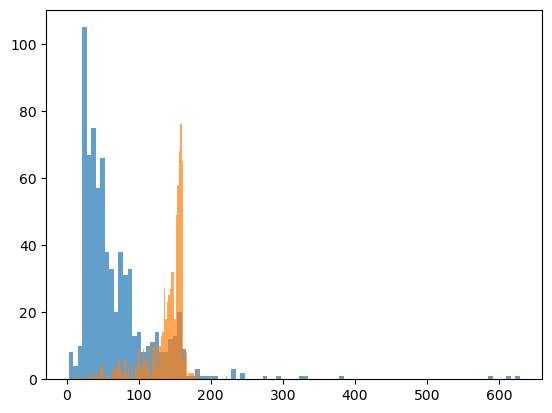

In [18]:
plt.hist(data[data['label']=="ham"]['length'] ,  bins =100 , alpha =.7);
plt.hist(data[data['label']=="spam"]['length'] , bins =100 , alpha =.7);

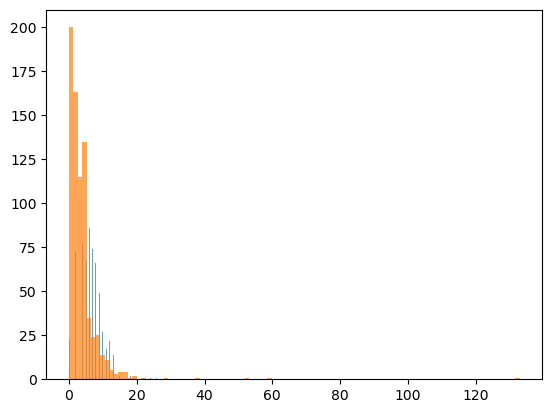

In [19]:
plt.hist(data[data['label']=="spam"]['punct'] ,  bins =100 , alpha =.7);
plt.hist(data[data['label']=="ham"]['punct'] ,  bins =100 , alpha =.7);


In [20]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(data["message"] , data["label"] ,test_size=0.2 , random_state=1 , shuffle=True)

## 2) Model

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neural_network import MLPClassifier
import xgboost 
import lightgbm
import catboost.text_processing
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score , precision_score , classification_report , confusion_matrix  , f1_score , recall_score , ConfusionMatrixDisplay

In [22]:
classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=256))])

In [23]:
classifier.fit(x_train , y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=256))])

In [24]:
y_pred = classifier.predict(x_test)

In [54]:
confusion_matrix(y_test , y_pred)

array([[150,   1],
       [ 12, 136]], dtype=int64)

In [42]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       151
        spam       0.99      0.92      0.95       148

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299



In [45]:
accuracy_score(y_test , y_pred)

0.9565217391304348

In [50]:
# Neural network
classifier_NN = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", MLPClassifier())])

In [52]:
classifier_NN.fit(x_train , y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', MLPClassifier())])

In [53]:
y_predNN = classifier_NN.predict(x_test)
confusion_matrix(y_test , y_predNN)

array([[147,   4],
       [  8, 140]], dtype=int64)

In [56]:
print(classification_report(y_test , y_predNN))

              precision    recall  f1-score   support

         ham       0.95      0.97      0.96       151
        spam       0.97      0.95      0.96       148

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299



In [58]:
from sklearn.model_selection import GridSearchCV
parameters = {
    "hidden_layer_sizes":np.arange(100 , 1000 , 10),
    "activation":['relu',"sigmoid","tanh"],
    "solver":['adam'],
    "shuffle":[False,True],
    "verbose":[False,True],
    "nesterovs_momentum":[False,True],
    "early_stopping":[False,True],
    
}
clf = GridSearchCV(classifier_NN , parameters)
clf.fit(x_train,y_train)

ValueError: Invalid parameter 'activation' for estimator Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', MLPClassifier())]). Valid parameters are: ['memory', 'steps', 'verbose'].